In [55]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings

In [56]:
df = pd.read_csv('./data/gemstone.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
1,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
2,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
3,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
4,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836


In [57]:
# spitting X and Y
X = df.drop(labels=['price'],axis=1)

Y = df[['price']]

Creating Pipeline with Column Transformer

In [58]:
# Define which columns should be ordinal-encoded and which should be scaled

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns



# Define the custom ranking for each ordinal variable 
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']



from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

# Numerical Pipeline
num_pipeline = Pipeline(
                steps = [
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())                
                ]
            )

# Categorical Pipeline
cat_pipeline = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinal_encoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
                
                ]
            )

preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,numerical_cols),
                ('cat_pipeline',cat_pipeline,categorical_cols)
                ]
            )

In [59]:
X = preprocessor.fit_transform(X)


In [60]:
preprocessor.get_feature_names_out()


array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [61]:
X.shape

(18906, 9)

In [62]:
#Train_Test_Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [63]:
X_train.shape , X_test.shape

((13234, 9), (5672, 9))

MODEL EVALUATION Function to give all metrics after model Training

In [64]:
def evaluate_model(true_value , pred_value):
    mae = mean_absolute_error(true_value , pred_value),
    mse = mean_squared_error(true_value , pred_value),
    rmse = np.sqrt(mean_squared_error(true_value , pred_value))
    r2_square = r2_score(true_value , pred_value)

    return mae, rmse , r2_square 

In [65]:
models = {

    "linear Regression" : LinearRegression(),
    "Ridge"             : Ridge(),
    "Lasso"             : Lasso(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    " Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regresssor" : RandomForestRegressor(),
    "AdaBoost regressor" : AdaBoostRegressor()
    
}

In [66]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  #training of model

    #prediction making
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    #Evaluating train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_predict)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_predict)


    
    print("model performance for taining dataset")
    print(f"- root mean squared error : {model_train_rmse:.4f}")
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-'*35)
    
    print("model performance for test dataset")
    print(f"- root mean squared error : {model_test_rmse:.4f}")
    print("- R2 Score: {:.4f}".format(model_test_r2))

  

    model_list.append(list(models.keys())[i])
    print(model_list[i])
    r2_list.append(model_test_r2)
    print(r2_list[i])

    print('='*35)
    print('\n')

model performance for taining dataset
- root mean squared error : 614.7045
- R2 Score: 0.9048
-----------------------------------
model performance for test dataset
- root mean squared error : 614.0873
- R2 Score: 0.9060
linear Regression
0.9059727876567772


model performance for taining dataset
- root mean squared error : 614.7070
- R2 Score: 0.9048
-----------------------------------
model performance for test dataset
- root mean squared error : 614.0514
- R2 Score: 0.9060
Ridge
0.9059837823979675




model performance for taining dataset
- root mean squared error : 614.8959
- R2 Score: 0.9048
-----------------------------------
model performance for test dataset
- root mean squared error : 614.3380
- R2 Score: 0.9059
Lasso
0.9058960091493822


model performance for taining dataset
- root mean squared error : 344.8307
- R2 Score: 0.9701
-----------------------------------
model performance for test dataset
- root mean squared error : 444.7562
- R2 Score: 0.9507
K Neighbors Regressor
0.9506783751630158


model performance for taining dataset
- root mean squared error : 3.4538
- R2 Score: 1.0000
-----------------------------------
model performance for test dataset
- root mean squared error : 441.7289
- R2 Score: 0.9513
 Decision Tree
0.9513475295040531




g:\gaurav education\DIAMOND_Price_Prediction\diamondenv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


model performance for taining dataset
- root mean squared error : 121.7481
- R2 Score: 0.9963
-----------------------------------
model performance for test dataset
- root mean squared error : 324.2583
- R2 Score: 0.9738
Random Forest Regresssor
0.9737834547438323




g:\gaurav education\DIAMOND_Price_Prediction\diamondenv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model performance for taining dataset
- root mean squared error : 589.3144
- R2 Score: 0.9125
-----------------------------------
model performance for test dataset
- root mean squared error : 587.2099
- R2 Score: 0.9140
AdaBoost regressor
0.9140234517742811




RESULT

In [67]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regresssor,0.973783
4,Decision Tree,0.951348
3,K Neighbors Regressor,0.950678
6,AdaBoost regressor,0.914023
1,Ridge,0.905984
0,linear Regression,0.905973
2,Lasso,0.905896


In [68]:
# Decision Tree is OverFitting , So we will not use this.
 #  Training score = 1   , Test score = 0.95

RANDOM FOREST REGRESSOR

In [69]:
ran_for_reg = RandomForestRegressor( n_estimators= 50)
random_forest_model = ran_for_reg.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

g:\gaurav education\DIAMOND_Price_Prediction\diamondenv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 Accuracy of the model is 97.41


Plotting y_pred vs y_actual

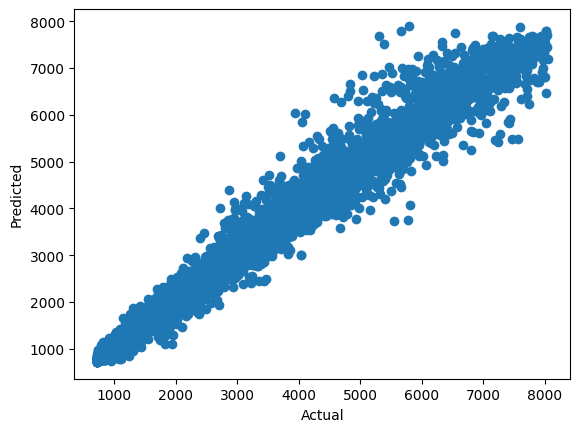

In [70]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');